In [61]:
#package.install('plot3D')
#package.install('data.table')

[1] "/Users/clarkepatrone"

In [ ]:
library(data.table)
library(plot3D)


# The Likelihood Ratio Test

## Assessing the Goodness of Fit of Two Competing Models

 # Motivation 
 
 ## Do we observe more CV events during the first 30, 90, 180 days of drug use versus the rest of the time a person is on a drug?
 
 ### Null hypothesis $H0$: The rate of CV events is constant over the exposure period
 ### Alternate hypothesis $H1$: The rate of CV events differs between time intervals within the exposure period

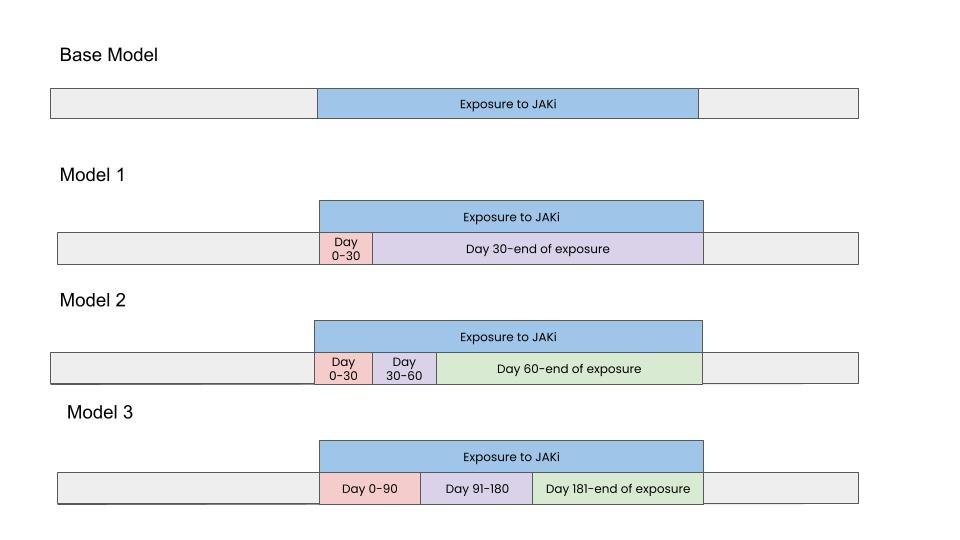

## Coin Flipping Example

Let's start by randomly flipping a unfair quarter with an unkown probability of landing a heads.

$P(heads) = \theta$  

We flip it ten times and get 7 heads and 3 tails.

In [45]:
set.seed(4)
s_quarter <- sample(c(0,1), 10, replace = TRUE, prob = c(.2,.7))
(s_quarter)

[1] 1 1 1 1 0 1 1 0 0 1

Based on this data what is our best guess for the probability of tossing a heads? 


In other words what parameter makes our data most likely. 

$L(\theta | d) = p_\theta (d)$


You might guess that since we have 7 heads and 3 tails our best guess for $\theta$ is 
$7/10 = .7$

Let's right a function to check that intuition by calculating how likely it is we see 7 heads for some possible values of in the parameter space $\theta$ .

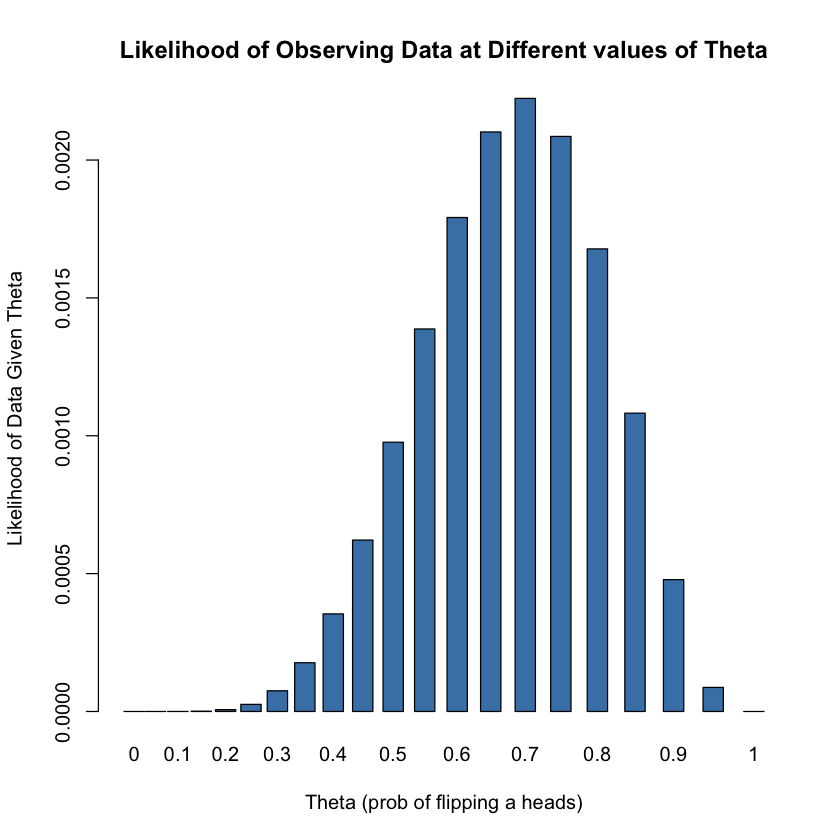

In [46]:
likelihood <- function(d, p){
  l <- 1
  for (i in d){
    if (i == 1){
      l <- l*p
    }
    else{
      l <- l *(1-p)
    }
  }
  return(l)
}

potential_ps <- seq(0, 1, by=.05)

barplot(likelihood(s_quarter, potential_ps), potential_ps, names= potential_ps, width=.9, col = "steelblue", 
        main="Likelihood of Observing Data at Different values of Theta",
  xlab="Theta (prob of flipping a heads)", ylab="Likelihood of Data Given Theta")

Great! So we confirmed that our intuition we are most likely to see that data when the value of $\theta = .7$

Now lets do the same experiment fliping a penny, again with an unkown probability of landing 
on heads

[1] 1 0 0 0 0 0 0 1 0 0

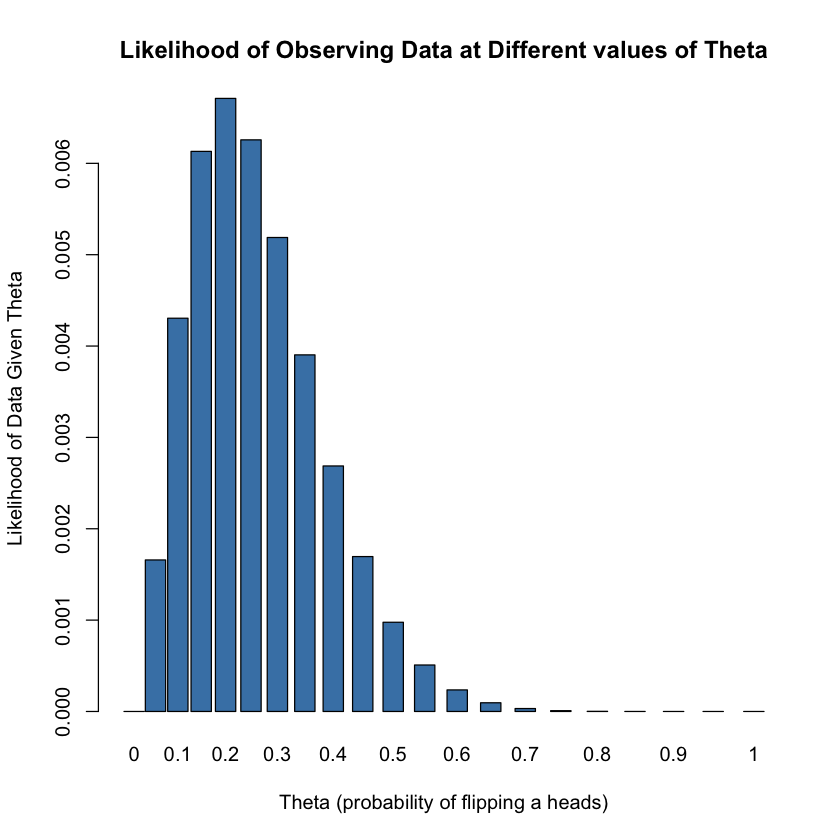

In [47]:
set.seed(7)
s_penny <- sample(c(0,1), 10, replace = TRUE, prob = c(.8,.2))
(s_penny)


barplot(likelihood(d = s_penny, p=potential_ps), potential_ps, names= potential_ps, width=.9, col = "steelblue", 
        main="Likelihood of Observing Data at Different values of Theta",
  xlab="Theta (probability of flipping a heads)", ylab="Likelihood of Data Given Theta")

Now lets make a new sequence by combining the ten flips we did with the quarter
and the then flips we did with the penny. 

In [48]:
quarter_then_penny = c(append(s_quarter,s_penny))
cat("quarter flips:", quarter_then_penny[1:10], "\n \n")
cat("penny flips:", quarter_then_penny[11:20], "\n \n")

cat("all flips:", quarter_then_penny)

quarter flips: 1 1 1 1 0 1 1 0 0 1 
 
penny flips: 1 0 0 0 0 0 0 1 0 0 
 
all flips: 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0

So now we have 20 total flips. If we didn't know that the coins were different and we
followed our procedure we might guess that since we have 9 head out of 20  our 
maximum likelihood would occur when we let the probability of heads be .45

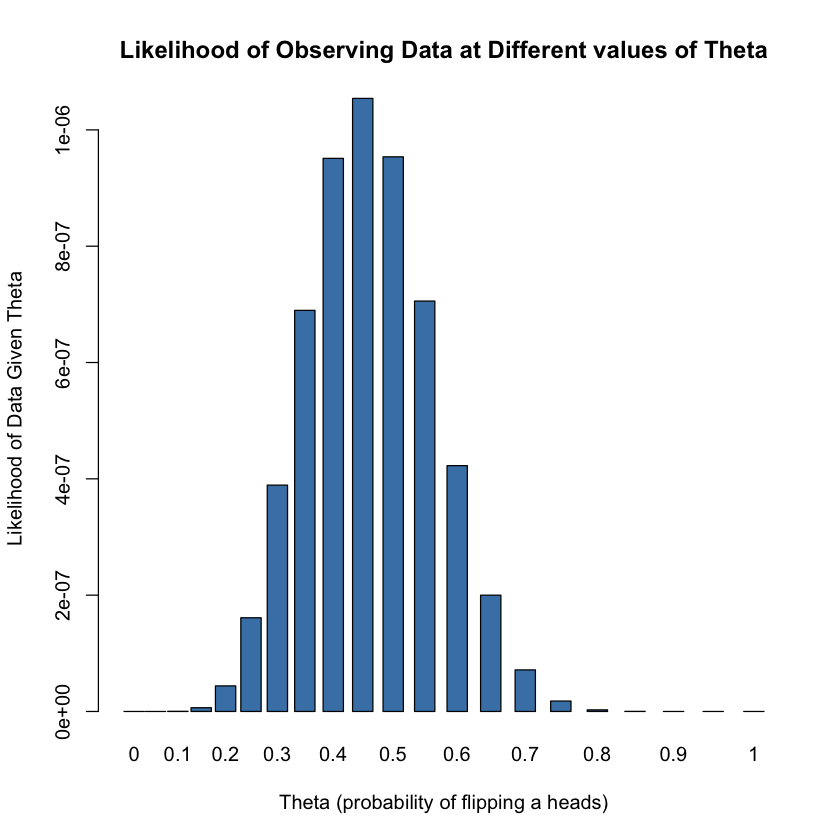

In [49]:
barplot(likelihood(quarter_then_penny, potential_ps), potential_ps, names= potential_ps, 
        width=.9, col = "steelblue", 
        main="Likelihood of Observing Data at Different values of Theta",
  xlab="Theta (probability of flipping a heads)", ylab="Likelihood of Data Given Theta")

Maybe we can do better though. What if know that there are two coins and we know
when we are flipping each of them. Now our
likelihood is the probability of the first sequence times the probability of the
second sequence

Warning message in space + width:
“longer object length is not a multiple of shorter object length”Warning message in space + width:
“longer object length is not a multiple of shorter object length”

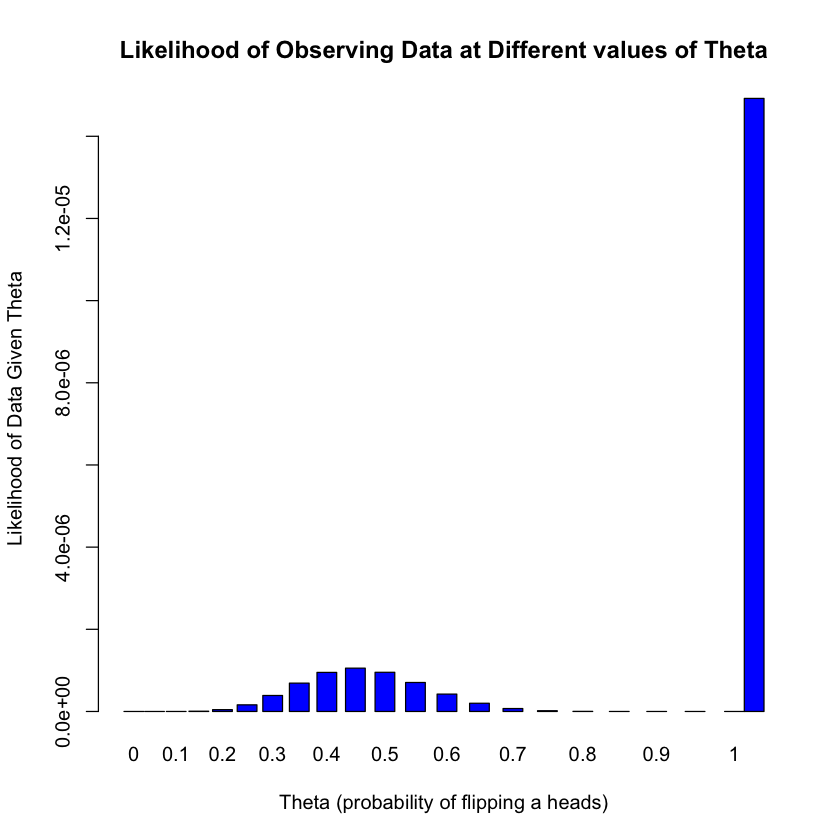

In [50]:
calc_likelihood_2_params <- function(s1,s2,p1,p2){
    l <- likelihood(s1,p1) * likelihood(s2,p2)
}

l_2coin <- calc_likelihood_2_params(s_quarter, s_penny,.7, .2)

barplot(c(likelihood(quarter_then_penny, potential_ps),l_2coin), potential_ps, names= c(potential_ps, ".7 and .2"), 
        width=.9,col= "blue", 
        main="Likelihood of Observing Data at Different values of Theta",
  xlab="Theta (probability of flipping a heads)", ylab="Likelihood of Data Given Theta")

A much better guess! By using two paramters instead of one we dramatically increased the likelihood that we observe our data given the paramter(s). Let's visualize our new paramter space:

[1] 1.49221e-05
[1] 1.49221e-05


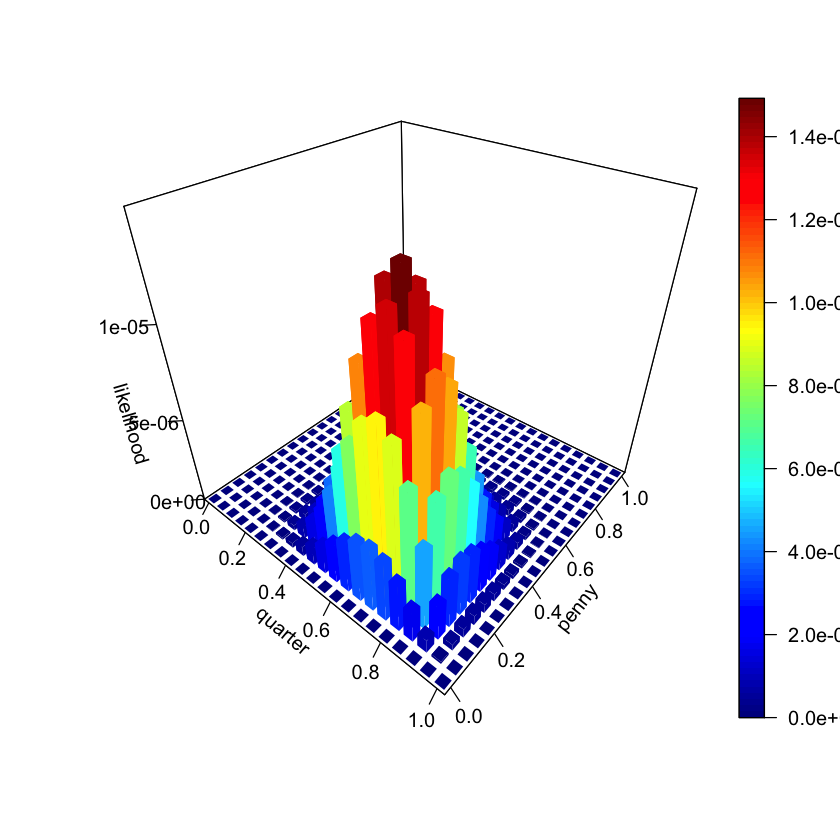

In [51]:
two_coin_matrix <-  ( (likelihood(s_quarter,potential_ps)) %o% (likelihood(s_penny, potential_ps)))

# Finds coordinates of maximum value in matrix
xy <- as.vector(which(two_coin_matrix==max(two_coin_matrix), arr.ind=T))

#check that max value occurs when theta quarter = .7  and theta penny = .2
print(two_coin_matrix[15,5])
print(max(two_coin_matrix))

hist3D(x = (potential_ps), y=potential_ps, z=two_coin_matrix, ticktype = "detailed", space = 0.35,phi = 35, color = rainbow,
      xlab="quarter", ylab = "penny", zlab = "likelihood")


Observe that our "simple" model of one coin is a subspace of the more complex 
model. Specifically, it is the subspace when the probability of getting a heads is the same for both coins. This occurs on the diagonal of the matrix.  If we take all of the likelihoods in the diagonal of our matrix
or slice the histogram down the diagonal we get the original likelihood graph.

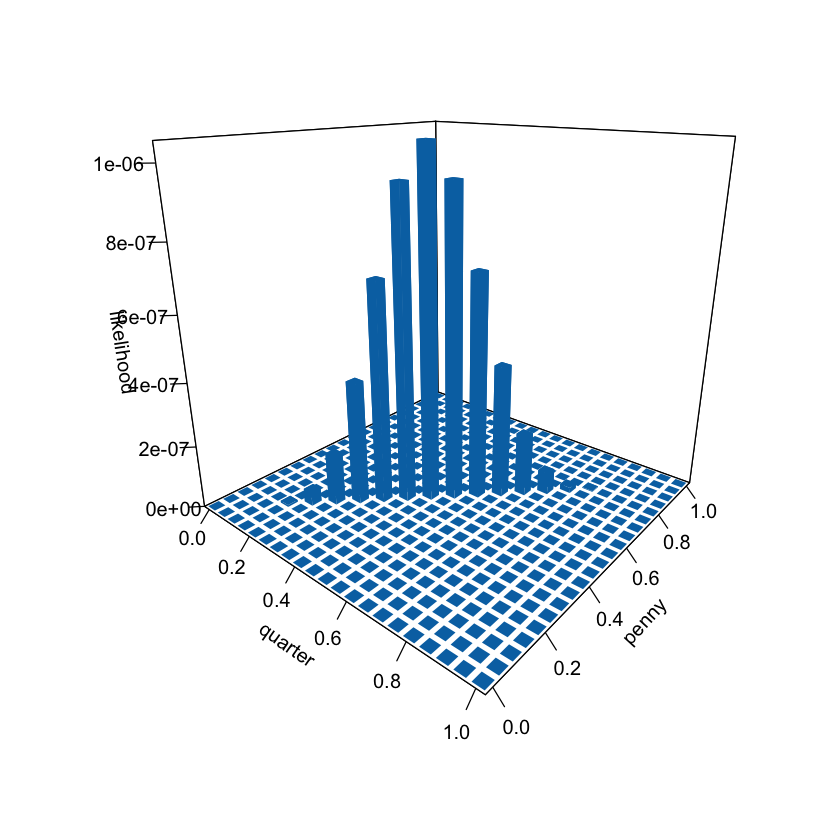

In [52]:
diagonal  <- diag(diag(two_coin_matrix))
hist3D(x = (potential_ps), y=potential_ps, z=diagonal, ticktype = "detailed", space = 0.3,phi = 20, col = "#0072B2",
      xlab="quarter", ylab = "penny", zlab = "likelihood")


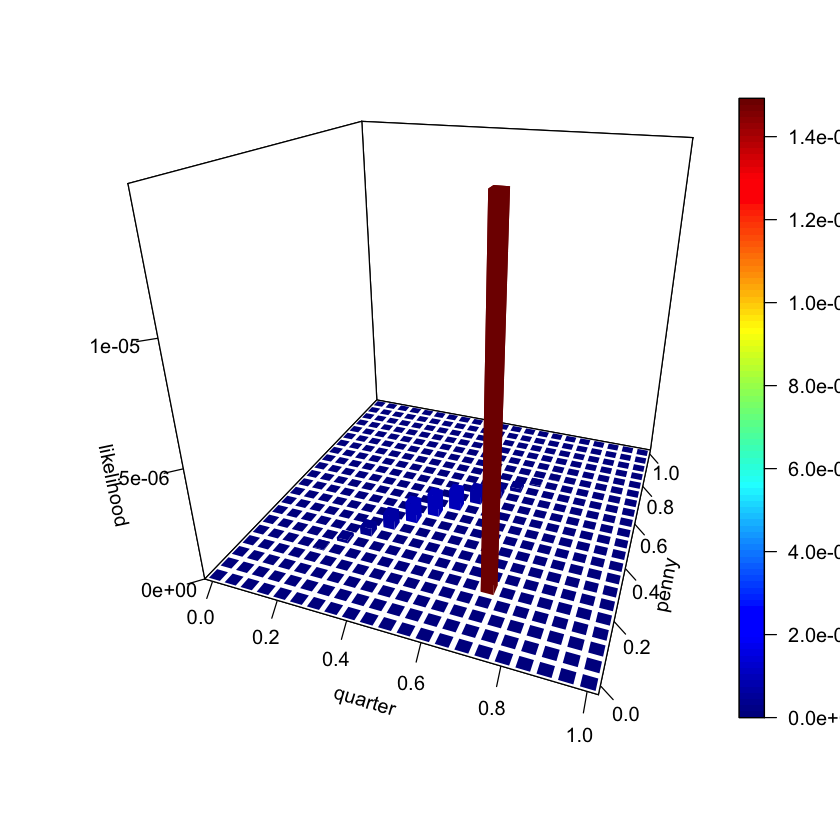

In [53]:
d2  <- diag(diag(two_coin_matrix))

#Uncomment to show max value
d2[15,5]<- two_coin_matrix[15,5]
hist3D(x = (potential_ps), y=potential_ps, z=d2, ticktype = "detailed", space = 0.3,phi = 25,
      xlab="quarter", ylab = "penny", zlab = "likelihood", theta= 20)


## From Likelihood to the Likelihood Ratio Test

We can see that the likelihood of observing the data is much higher in the 2-coin model than in the one coin model. 
How can we quantifiably determine if this is significant or not though? A first step might be to take the __Likelihood Ratio__: which is defined as the ratio of the __Maximum Likelihood__ of our simple model over the __Maximum Likelihood__ of the complex model $MLsimple/MLcomplex$

Let's also define our null and alternative hypothesis:

Null Hypothesis: Probability of Heads Quarter = Probability Heads Penny

Alternative Hypothesis: Probability of Heads Quarter != Probability Heads Penny

In [54]:
ML_simple <- max(diagonal)
ML_complex <- max(two_coin_matrix)

LR <- ML_simple/ML_complex
cat("The ratio of the ML of the simple model to the ML of the complex model is: ", LR)

The ratio of the ML of the simple model to the ML of the complex model is:  0.07064351

Okay so our value is much closer to 0 then to 1 so we might think the complex model is better and we should reject our null hypothesis. But this is still just an eyeball intuition. To quantify this further we need the help of **Wilks Theorem** which states that $-2log(LR)$ is chi-square distributed when the __null hypothesis is true__. 

The __Likelihood Ratio Test Statistic__ is $ \lambda_{LR}=-2 [log(Max Likelihood Simple Model) - log(Max Likelihood Complex Model)]$

### Chi-Square Distribution

Why in the world is that true? Well first of all what is the chi-square distribution? The chi-square distribution is the sum of the squares of k independent standard normal random variables. $\chi^2(k) = \sum_{i=1}^{k} Z_i^{2}$






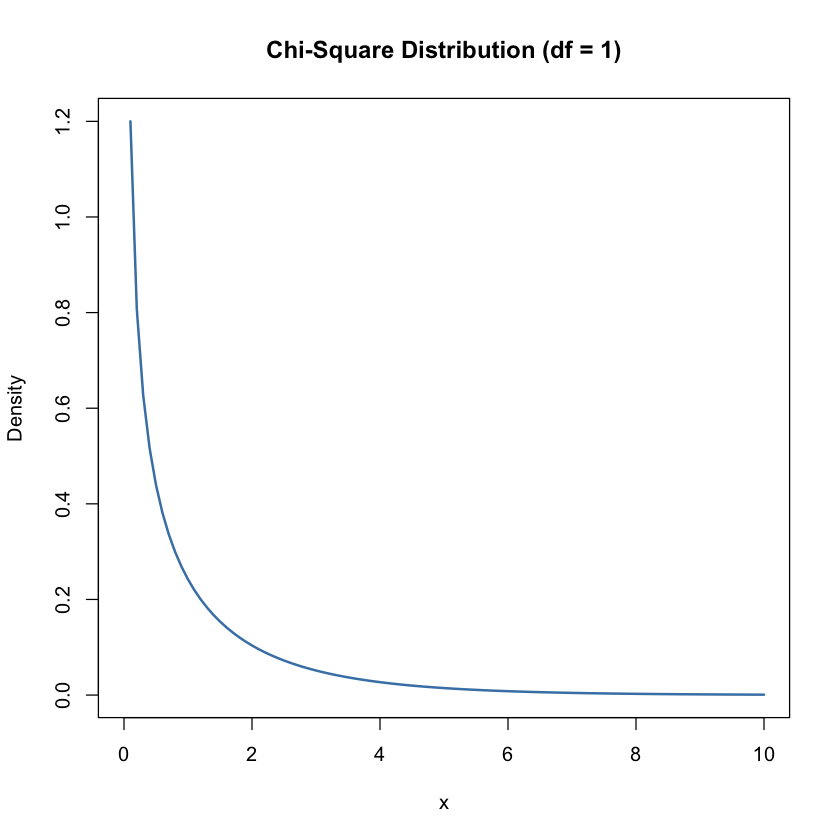

In [55]:
curve(dchisq(x, df = 1), from = 0, to = 10, main = 'Chi-Square Distribution (df = 1)', #add title
      ylab = 'Density', #change y-axis label
      lwd = 2, #increase line width to 2
      col = 'steelblue') #change line color to steelblue)

Can we make our LR look like that. How can we turn a ratio into a sum. Answer we take the log. 

Doing so gives us $log(ML Simple) - log(ML Complex)$ and then multiply by negative -1 for $-1 *[log(ML Simple) - log(ML Complex)]$

But we dont want normal R.V. we want squared normal variables.

$-1 * [log(ML Simple^{2}) - log(ML Complex^{2}])$

and by the rule of logarithms we get 

$-2 *[log(ML Simple) - log(ML Complex)]$

Wilks Theorem tells us that the above statistic will asympotically be Chi-Square Distributed



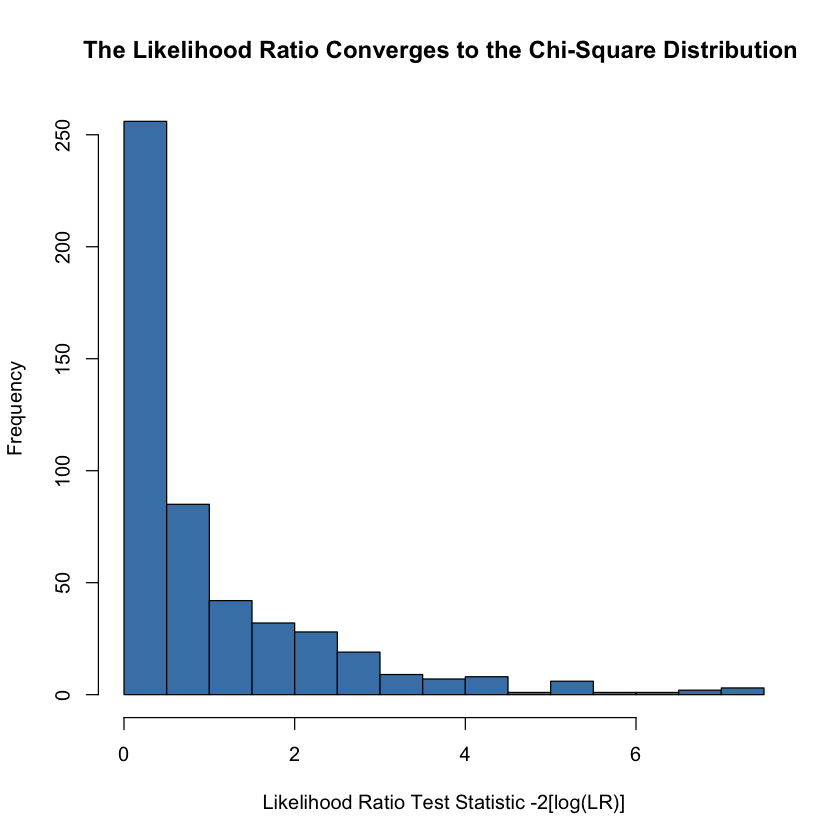

In [56]:
flip2coins <- function(p1, p2, n){
    s1 <- sample(c(0,1), n/2, replace = TRUE, prob = c(1-p1,p1))
    s2 <- sample(c(0,1), n/2, replace = TRUE, prob = c(1-p2,p2))
    s <- c(append(s1,s2))
    d <- c(list(s),list(s1),list(s2))
    names(d) <- c("all", "quarter", "penny")
    return(d)
}


#Flip a coin 1000 times 500 times
flips_per_experiment = 1000
n_experiments = 500
prob_heads = .4
flips <- list()
for (i in 1:n_experiments){
    flips = c(flips, list((flip2coins(prob_heads,prob_heads,flips_per_experiment))))
}


calc_LRTs <- function(d){
    ps <- seq(0,1 ,by=.01)
    l1 <- max(likelihood(d[[1]][['all']],ps))
    l2 <- max(likelihood(d[[1]][['quarter']], ps) %o% likelihood(d[[1]][['penny']],ps))
    lr <- l1/l2
    lrt <- -2 * (log(lr))
    return(lrt)
}


LRTs <- c()
for (j in 1: length(flips)){
    LRTs <- append (LRTs, calc_LRTs(flips[j]))
}


hist(sort(LRTs), breaks= 20, col = "steelblue", main="The Likelihood Ratio Converges to the Chi-Square Distribution ",
  ylab="Frequency", xlab="Likelihood Ratio Test Statistic -2[log(LR)]")





The likelihood ratio test statistic in our example with the quarter and the penny is:  5.300218 
 
Given that the null hypothesis is true there is a  2.132276  percent chance of observing a Likelihood ratio statistic at that value 


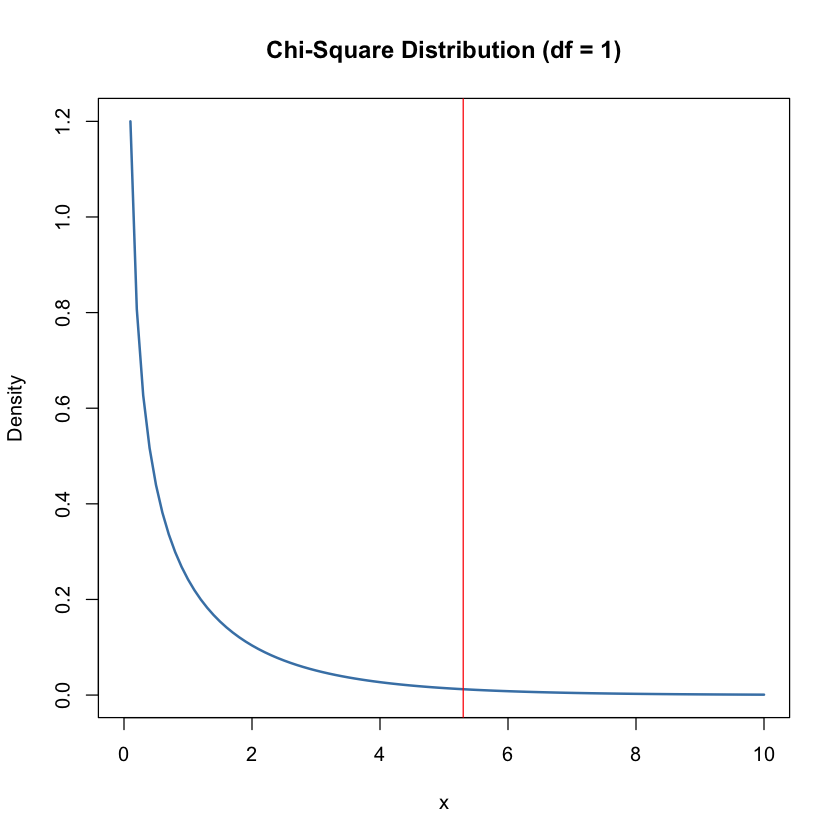

In [57]:
LRT <- -2 *log(ML_simple/ML_complex)

cat("The likelihood ratio test statistic in our example with the quarter and the penny is: ",LRT, "\n \n")


prob_val_given_null <- (1- pchisq(LRT, df =1))

cat("Given that the null hypothesis is true there is a ", prob_val_given_null*100, 
    " percent chance of observing a Likelihood ratio statistic at that value \n")

curve(dchisq(x, df = 1), from = 0, to = 10, main = 'Chi-Square Distribution (df = 1)', #add title
      ylab = 'Density', #change y-axis label
      lwd = 2, #increase line width to 2
      col = 'steelblue') #change line color to steelblue)
abline(v=LRT, col="red")

So in our coin example we should use the two variable model. 

## Back to our original example of drug exposure periods

Now lets return to our question of exposure periods for JAKi drugs and cardiovascular event rates

In [58]:
sccs <-fread("/Users/clarkepatrone/Desktop/R_Projects/SCCS_PRELIMV2/MACE/model_1/full_cohort/full_cohort.csv")
sccs1 <- sccs[ENTRY_COHORT_IsExcluded==FALSE, ]

sccs1[["EXPOSED"]] = sccs1$SELF_CONTROLLED_PERIOD_RISK_1 | sccs1$SELF_CONTROLLED_PERIOD_RISK_2
head(sccs1[, c("SELF_CONTROLLED_PERIOD_RISK_1", "SELF_CONTROLLED_PERIOD_RISK_2", "EXPOSED", "OUTCOME_CASES_0")])
tail(sccs1[, c("SELF_CONTROLLED_PERIOD_RISK_1", "SELF_CONTROLLED_PERIOD_RISK_2", "EXPOSED", "OUTCOME_CASES_0")])


SELF_CONTROLLED_PERIOD_RISK_1,SELF_CONTROLLED_PERIOD_RISK_2,EXPOSED,OUTCOME_CASES_0
FALSE,FALSE,FALSE,0
FALSE,FALSE,FALSE,0
FALSE,FALSE,FALSE,0
FALSE,FALSE,FALSE,0
FALSE,FALSE,FALSE,0
FALSE,FALSE,FALSE,1


SELF_CONTROLLED_PERIOD_RISK_1,SELF_CONTROLLED_PERIOD_RISK_2,EXPOSED,OUTCOME_CASES_0
FALSE,FALSE,FALSE,0
TRUE,FALSE,TRUE,0
FALSE,TRUE,TRUE,0
FALSE,TRUE,TRUE,0
FALSE,TRUE,TRUE,0
FALSE,FALSE,FALSE,0



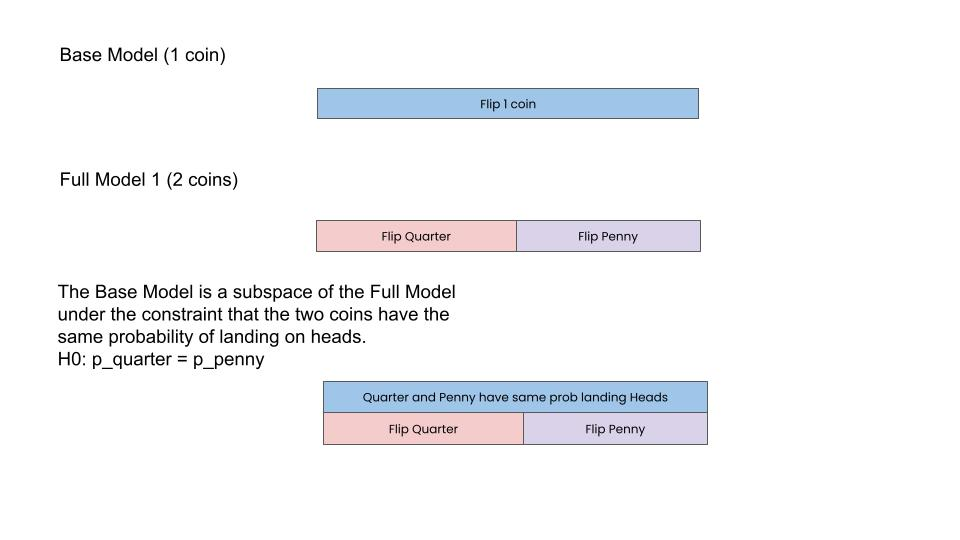

In [59]:
log_likelihood_simple <- -4134.0

log_likelihood_complex <- -4133.3

statistic <- -2 *(log_likelihood_simple - log_likelihood_complex)

print(statistic)


cat("Given that the null hypothesis is true there is a ",(1- pchisq(statistic, df =1)) *100, 
    " percent chance of observing a Likelihood Ratio Statistic at that value or greater \n")



[1] 1.4
Given that the null hypothesis is true there is a  23.67236  percent chance of observing a Likelihood Ratio Statistic at that value or greater 
